<a href="https://colab.research.google.com/github/rdbhatkal/Ad-Click-Prediction/blob/main/Ad_Clicks_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [55]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#ML libraries
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# reading the csv file from the drive 
filename = '/content/drive/MyDrive/coding dojo/Stack 2/Week 3/advertising.csv'
df = pd.read_csv(filename)

In [58]:
# Looking at first 5 rows of the dataframe
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [59]:
#The shape of the data set 
df.shape

(1000, 10)

# Cleaning and Handelling duplicate values

In [60]:
# Looking at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [61]:
# Checking for duplicate values
df.duplicated().sum()

0

In [62]:
# Checking null values
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no null values or duplicate values in our dataset so we continue with our exploration

## Lets check the column datatypes to ensure it matches the data description

In [63]:
# Find all attributes that are int or float
dtypes = df.dtypes
num_cols = dtypes[dtypes!='object'].index
num_cols

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [64]:
#Looking of any inconsistencies in numerical variables
for col in num_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Daily Time Spent on Site
77.05    3
62.26    3
75.55    3
84.53    3
78.76    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: Daily Time Spent on Site, Length: 900, dtype: int64



- Column= Age
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64



- Column= Area Income
61833.90    1
58966.22    1
69805.70    1
60315.19    1
67323.00    1
           ..
74024.61    1
60550.66    1
57983.30    1
52736.33    1
29875.80    1
Name: Area Income, Length: 1000, dtype: int64



- Column= Daily Internet Usage
161.16    2
158.22    2
228.81    2
162.44    2
211.87    2
         ..
115.35    1
230.91    1
205

In [65]:
# Find all attributes that are objects
dtypes = df.dtypes
obj_cols = dtypes[dtypes=='object'].index
obj_cols

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [66]:
#Looking of any inconsistencies in object columns values
for col in obj_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Ad Topic Line
Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64



- Column= City
Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64



- Column= Country
France                                                 9
Czech Republic          

In [67]:
#Looking at the unique rows in the in object columns values
for col in obj_cols:
    print(f"- Column= {col}")
    print(df[col].nunique(dropna=False))
    print('\n\n')

- Column= Ad Topic Line
1000



- Column= City
969



- Column= Country
237



- Column= Timestamp
1000





In [68]:
# taking a closer look at the Country column
df['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

From the above output we can see that "Ad Topic Line" and "Timestamp" have unique values for each row. 

The column 'City' also has substantial amount of unique columns so we can consider dropping these columns

The 'Country' column has 237 unique countries in our dataset and no single country is too dominant.

Having a large number of unique elements will not allow our machine learning model to establish good relationships. For this reason, we can consider dropping "Ad Topic Line", "City", "Timestamp" and "Country" columns



In [69]:
# Create a copy of the dataset before we drop columns
df_fe=df.copy()

In [70]:
# dropping columns with too many unique values 
df.drop(['Ad Topic Line','City', 'Country','Timestamp'], axis=1, inplace = True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## Lets us now take a look at our numerical columns

In [71]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Lets create histograms and boxplots to visualize the distribution among our univariate variables and see if there are any outliers

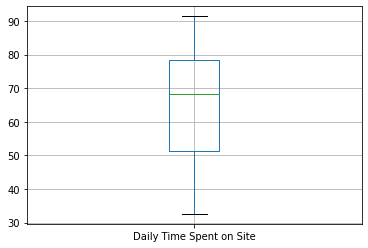

In [72]:
# checking the distribution of Daily Time Spent on Site column
df.boxplot(column = 'Daily Time Spent on Site'); 

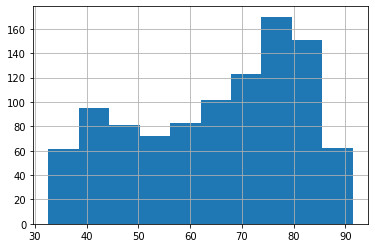

In [73]:
df['Daily Time Spent on Site'].hist();

We see that there are no outliers in our Daily Time Spent on Site column.

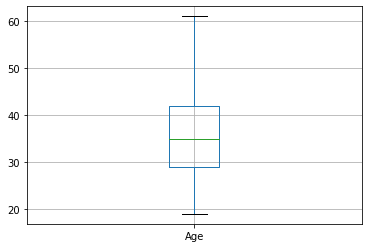

In [74]:
# checking the distribution of Age column
df.boxplot(column = 'Age'); 

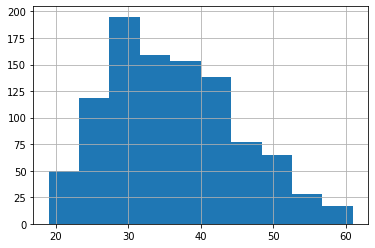

In [75]:
df['Age'].hist();

We see that there are no outliers in our Age column.

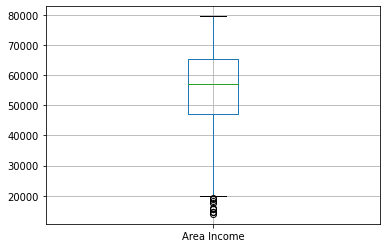

In [76]:
# checking the distribution of Area Income column
df.boxplot(column = 'Area Income'); 

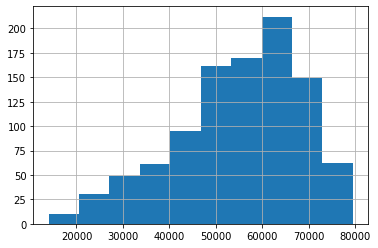

In [77]:
# checking the distribution of Area Income column
df['Area Income'].hist();

We see that there are some outliers in our Area Income column. The distribution of the Area Income column is right skewed

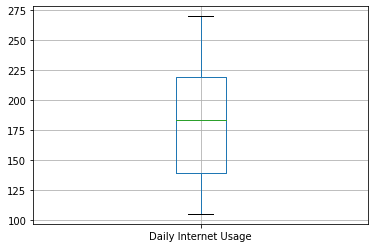

In [78]:
# checking the distribution of Daily Internet Usage column
df.boxplot(column = 'Daily Internet Usage'); 

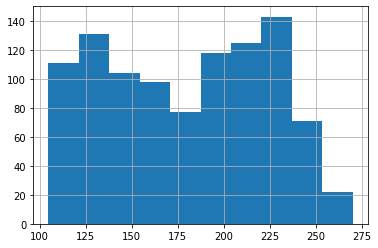

In [79]:
df['Daily Internet Usage'].hist();

We see that there are no outliers in our Daily Internet Usage column

# Data Analysis

## Let us look to see what kind of relationships we have amoung our feature and target variable

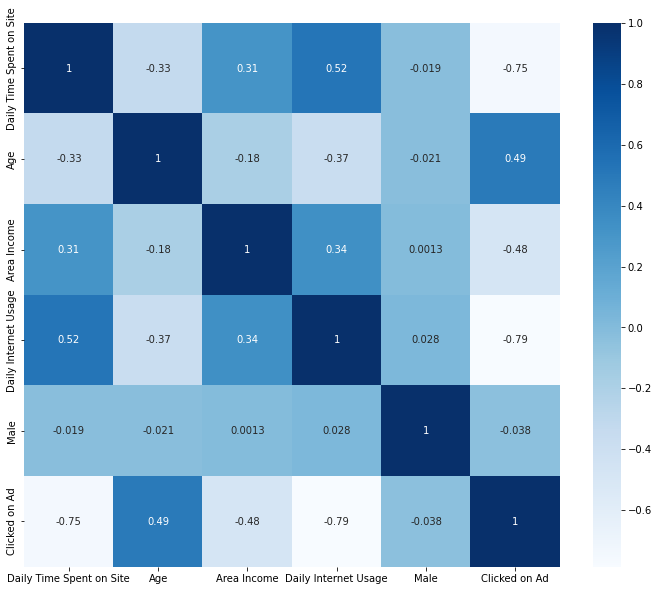

In [80]:
#Understanding correlations amoung our numeric variables
corr = df_fe.corr()

fig = plt.figure(figsize = (12,10))
sns.heatmap(corr, cmap='Blues', annot = True);

There is are positive as well as negative correlation between the feature and the target variable. There is also some correlation between the features indication multicollinearity

Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

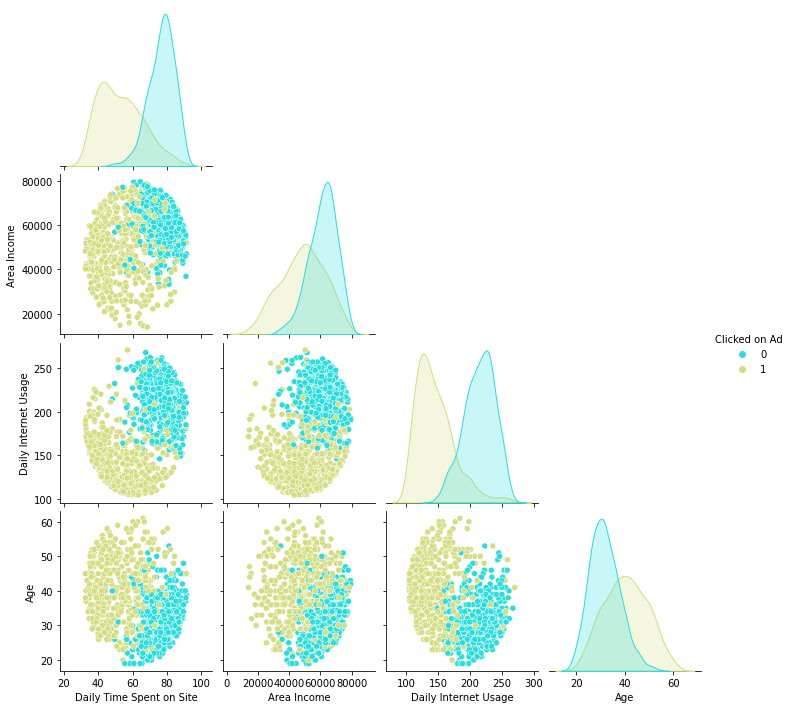

In [81]:
# Plot pairwise relationships in a dataset.
sns.pairplot(df_fe, 
             vars = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage','Age'],
             hue = 'Clicked on Ad', palette = 'rainbow', corner=True);

From our above plots and correlation heatmap, we see a moderate positive correlation between our target variable "Clicked on Ad" and "Age" feature.

There is also a strong negative correlation between our target variable "Clicked on Ad" and "Daily Internet Usage" feature.

There is also some correlation between the features indication multicollinearity. There is a moderate positive correlation between "Daily Internet Usage" and "Daily Time Spent on Site"

## Observation 1:

Source: https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions

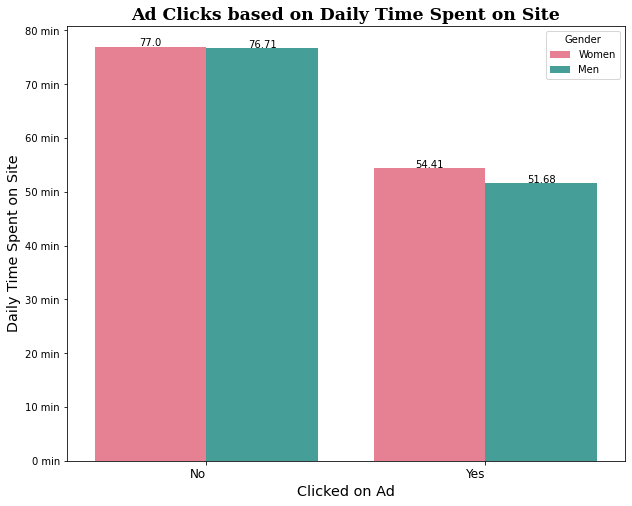

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
graph = sns.barplot(x = 'Clicked on Ad', y = 'Daily Time Spent on Site', hue = 'Male', data = df_fe, palette = 'husl', ci = None);

ax.set_title('Ad Clicks based on Daily Time Spent on Site', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
             
## Increasing Axis Label Font Sizes
ax.set_xlabel('Clicked on Ad',
              fontsize='x-large')
ax.set_ylabel("Daily Time Spent on Site",
              fontsize='x-large')

## Adding Count labels 
for p in graph.patches:
    height = round(p.get_height(),2)
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center");

## Setting labels
Clicklabel = ['No', 'Yes']
ax.set_xticklabels(Clicklabel,
                   fontsize='large',  
         horizontalalignment='right')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
time_fmt = mpl.ticker.StrMethodFormatter('{x:,.0f} min')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(time_fmt)

# Modifying legend

plt.legend(title='Gender', loc='upper right', labels=['Women', 'Men'])
plt.show()

From the above plot, we can observe that even though people are spending more time on the internet they are not clicking more ads

Additionaly:

An increase in 'Daily Time Spent on the Site' doesnt imply that the person is more likely to click on Ads.

We see that for people who spend around 55 mins on the site daily are more likely to click on Ads.

Women tend to spend more time on the internet than males

Women also tend to click on Ads slightly more than Men

## Observation 2: 

We know age is correlated to Clicked on Ads. So lets take a closer look at the age variable

In [83]:
df['Age'].describe()

count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

Source: https://www.geeksforgeeks.org/how-to-make-histograms-with-density-plots-with-seaborn-histplot/

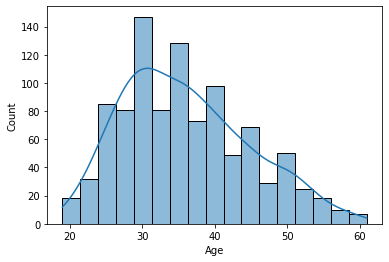

In [84]:
# Plot histogram
sns.histplot(df['Age'], kde = True);

We see that there are approximatly 7 intervals in the Age histogram.

We will split our Age feature into 7 different segments and assign it a label for clear analysis.

In [85]:
# Calculating bin intervals 
np.histogram_bin_edges(df['Age'], bins=7, range=None, weights=None)

array([19., 25., 31., 37., 43., 49., 55., 61.])

In [86]:
# Creating a copy of the dataset to add Age labels 
dfAge = df.copy()

Source : https://www.geeksforgeeks.org/create-a-column-using-for-loop-in-pandas-dataframe/

In [87]:
# Creating a loop to add labels for each Age value
ALabel = []
for age in dfAge['Age']:
  if (age >= 19) and (age < 25):
    ALabel.append('19-24')
  elif (age >= 25) and (age < 31):
    ALabel.append('25-30')
  elif (age >= 31) and (age < 43):
    ALabel.append('31-42')
  elif (age >= 43) and (age < 49):
    ALabel.append('43-48')
  elif (age >= 49) and (age < 55):
    ALabel.append('49-54')   
  else:
    ALabel.append('55+')

In [88]:
# Adding a new column for labels to our dfAge dataset 
dfAge['AgeLabel'] = ALabel
dfAge.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,AgeLabel
0,68.95,35,61833.90,256.09,0,0,31-42
1,80.23,31,68441.85,193.77,1,0,31-42
2,69.47,26,59785.94,236.50,0,0,25-30
3,74.15,29,54806.18,245.89,1,0,25-30
4,68.37,35,73889.99,225.58,0,0,31-42


Lets count the number of people in each Age group who clicked on an Ad

In [89]:
# Using group by to analyise how many mins do peopel in each Age Category Spend on a site
AgeTimeSpent = dfAge.groupby(['AgeLabel'])['Daily Time Spent on Site'].mean()
AgeTimeSpent

AgeLabel
19-24    68.935634
25-30    70.109181
31-42    66.121373
43-48    57.627934
49-54    53.465000
55+      60.147692
Name: Daily Time Spent on Site, dtype: float64

Source: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/


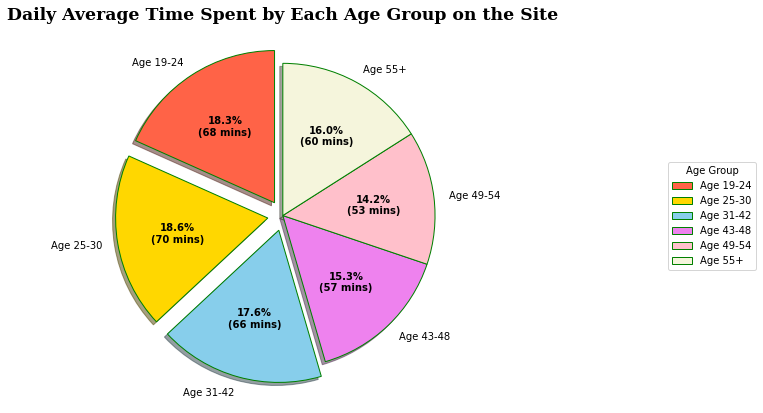

In [90]:
#Lets Plot the above results 

# Creating labels
Label = ['Age 19-24', 'Age 25-30', 'Age 31-42','Age 43-48', 'Age 49-54', 'Age 55+']

# Creating color parameters
colors=('tomato', 'gold', 'skyblue','violet','pink', 'beige')

# Creating explode data
explode = [0.1, 0.1, 0.1, 0, 0, 0]

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} mins)".format(pct, absolute)
    
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(AgeTimeSpent,
                                  autopct = lambda pct: func(pct, AgeTimeSpent),
                                  explode = explode,
                                  labels = Label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 # Adding legend
ax.legend(wedges, Label,
          title ="Age Group",
          loc ="center left",
          bbox_to_anchor =(1.5, 0,1 ,1));

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Daily Average Time Spent by Each Age Group on the Site",
              fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
 
# show plot
plt.show()

In [91]:
dfAge['Daily Time Spent on Site'].describe()

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64

Add some text we se avg time spent os 65 min 

3 age lables spend more than 65 min per day on the 

Let see if people in this age group click on ads

In [92]:
# Normalize a Pandas Crosstab for Row/Column Percentages
result = pd.crosstab(index=dfAge['Clicked on Ad'], 
                     columns=dfAge['AgeLabel'], 
                     values=dfAge['Clicked on Ad'], 
                     aggfunc='count',normalize='columns')

# Print the result 
print(result) 

AgeLabel          19-24     25-30     31-42     43-48     49-54  55+
Clicked on Ad                                                       
0              0.760563  0.724138  0.540773  0.173554  0.059524  0.0
1              0.239437  0.275862  0.459227  0.826446  0.940476  1.0


In [93]:
# Save the result in percentage in a new variable
perresult = (result*100)
perresult

AgeLabel,19-24,25-30,31-42,43-48,49-54,55+
Clicked on Ad,,,,,,
0,76.056338,72.413793,54.077253,17.355372,5.952381,0.0
1,23.943662,27.586207,45.922747,82.644628,94.047619,100.0


Source:
https://pythonguides.com/put-legend-outside-plot-matplotlib/#:~:text=In%20Matplotlib%2C%20to%20set%20a,the%20bbox_to_anchor%20attribute%20to%20it.&text=We%20use%20the%20bbox_to_anchor%3D(,the%20coordinates%20of%20the%20legend.

https://www.tutorialspoint.com/how-to-change-bar-chart-values-to-percentages-in-matplotlib




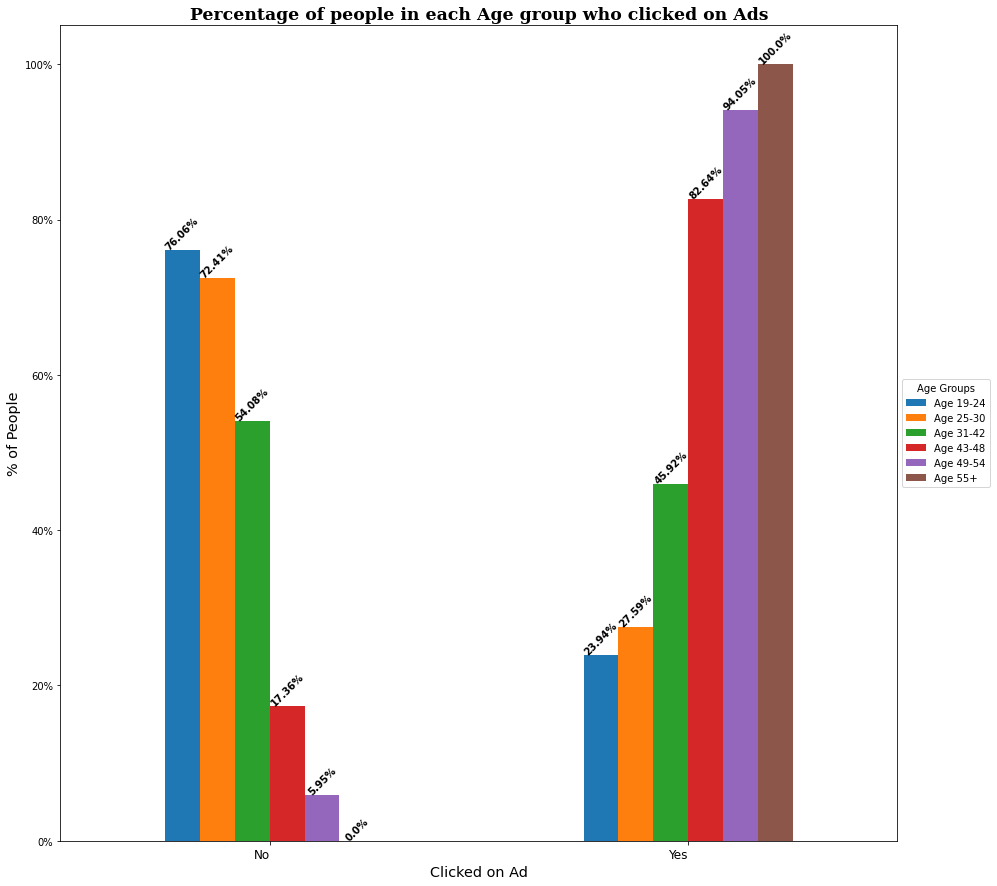

In [94]:
#Lets plot the above result
fig, ax = plt.subplots(figsize=(15,15))

Label = ['Age 19-24', 'Age 25-30', 'Age 31-42','Age 43-48', 'Age 49-54', 'Age 55+']

graph = perresult.plot(kind='bar', ax = ax)
ax.set_title('Percentage of people in each Age group who clicked on Ads', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');
## Increasing Axis Label Font Sizes
ax.set_xlabel('Clicked on Ad',
              fontsize='x-large')
ax.set_ylabel("% of People",
              fontsize='x-large')

## Adding Percentage labels 
for rect1 in graph.patches:
    height = round(rect1.get_height(),2)
    graph.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",
                   fontweight='semibold',
                   rotation=45 )

## Setting labels
Clicklabel = ['No', 'Yes']
ax.set_xticklabels(Clicklabel,
                   fontsize='large',  
         horizontalalignment='right', rotation = 'horizontal')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
perc_fmt = mpl.ticker.StrMethodFormatter('{x:,.0f}%')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(perc_fmt)

# Modifying legend
plt.legend(title='Age Groups', loc='center left', bbox_to_anchor=(1, 0.5),
           labels=['Age 19-24', 'Age 25-30', 'Age 31-42','Age 43-48', 'Age 49-54', 'Age 55+'])
plt.show()



From the above chart we observe that: 


*   The highest group of people i.e 43% of people who click on Ads belong to the Age group 31-42

*   20 % of people who click on Ads belong to the Age group 43-48

* Ages 31-48 seems like a population of working class people. This could indicate that, these people spend higher amount of time on the Internet and hence are more susceptible to click on Ads


*   The lowest group of people i.e 3% of people who click on Ads belong to the Age group 19-24

*There could be two reasons of this:*


*   People of this age group could be spending more time on the Internet but are not attracted to  Ads and are knowledgeable to know how to avoid Ads by using browser extentions that block Ads

*   Another reason could be, people of this age group spend less time on the internet which resuts to viewing lesser ads 

# Machine Learning 

Our task is to help understand what subset of people are most likely to click on Ads. This is a classification problem. 
Our Target variable for this problem is the "Clicked on Ads" column

## Splitting the Dataset

In [95]:
# Define features (X) and target (y)
X = df.drop(['Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [96]:
# Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Understanding our features

Since we only have numerical columns, we will scale all our numeric columns

## Instantiate Transformers

In [97]:
# Scaler
scaler = StandardScaler()

## Now let us build a model to help classify our Clicked on Ads variable

### 1) Random Forest

In [98]:
# Create a default model 
# Make an instance of the model
rf_clf = RandomForestClassifier(random_state=42)

# Put scaler and model in a pipeline
rf_clf_pipe = make_pipeline(scaler, rf_clf)
rf_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [99]:
# Accuracy:
print('Accuracy of Train set', accuracy_score(y_train, rf_clf_pipe.predict(X_train)))
print('Accuracy of Test set', accuracy_score(y_test, rf_clf_pipe.predict(X_test)))

Accuracy of Train set 1.0
Accuracy of Test set 0.944


With the default model we get the below scores:

Training Score: 1.0

Testing Score: 0.94

Lets try to improve our model by tuning hyperparameters

In [103]:
# What was the max depth of our default tree?
est_depths = [estimator.get_depth() for estimator in rf_clf.estimators_]
max(est_depths)

13

In [104]:
# List of values to try for max_depth:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestClassifier(max_depth=depth, random_state=42)
   modelp = make_pipeline(scaler, model)
   modelp.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = modelp.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = modelp.score(X_test, y_test)
   scores.head()

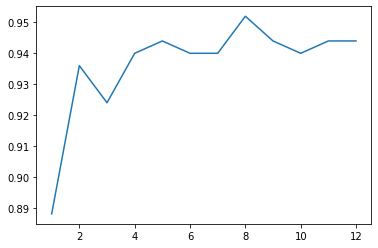

In [105]:
# plot the change in scores to see if that gives us insight into the best maximum depth.
plt.plot(scores['Test Score'])

In [106]:
# store the scores in the scores dataframe
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
8,0.952,0.996000
5,0.944,0.989333
9,0.944,0.998667
11,0.944,1.000000
12,0.944,1.000000


In [107]:
# choose a couple of values for n_estimators 
n_ests = [10, 20,30,40,50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=8)
   modelp = make_pipeline(scaler, model)
   modelp.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = modelp.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = modelp.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
10,0.94,0.994667
20,0.94,0.996
30,0.936,0.994667
40,0.952,0.997333
50,0.948,0.996


In [108]:
# store the scores in the scores dataframe
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
40,0.952,0.997333
100,0.952,0.996
50,0.948,0.996
200,0.944,0.996
250,0.944,0.996


In [109]:
# Lets set the n_estimator to 40 and max_depth = 8
rf_2 = RandomForestClassifier( n_estimators=40,max_depth=8, random_state=42)
rf_2_pipe = make_pipeline(scaler, rf_2)
rf_2_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, n_estimators=40,
                                        random_state=42))])

In [110]:
# Accuracy:
print('Training accuracy:', rf_2_pipe.score(X_train, y_train))
print('Test accuracy:', rf_2_pipe.score(X_test, y_test))

Training accuracy: 0.9973333333333333
Test accuracy: 0.952


By Setting our Random Forest Classifier model with n_estimator = 40 and max_depth = 8 gives us an accuracy of 95.2% on our test set. 
We can see that after tuning our hyperparameters, our accuracy on the test set has increased from 94.4% to 95.2%

In [111]:
# save predictions
rfpreds = rf_2_pipe.predict(X_test)

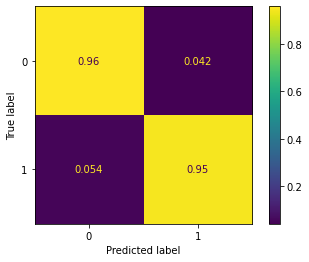

In [112]:
# use ConfusionMatrixDisplay to create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rfpreds,normalize='true');

The confusion matrix shows that this model is slightly better at predicting users who did not clicked on Ads vs users who clicked on Ads.

In order to get the full picture of how our model is performing we can take a look at the clasification report

In [113]:
# Clasification report for RF model
print(classification_report(y_test, rfpreds, zero_division =1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       120
           1       0.96      0.95      0.95       130

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



We can see that the Random Forest Classifier model gives us an overall accuracy of 95%

### 2) KNN

In [114]:
# Create a default KNN model and make an instance of the model
knn1 = KNeighborsClassifier()

# Put preprocessor and model in a pipeline
knn1_pipe = make_pipeline(scaler, knn1)
knn1_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [115]:
# Evaluate default KNN model  
print('Accuracy of Train set', accuracy_score(y_train, knn1_pipe.predict(X_train)))
print('Accuracy of Test set', accuracy_score(y_test, knn1_pipe.predict(X_test)))

Accuracy of Train set 0.9733333333333334
Accuracy of Test set 0.936


With the default model we get the below scores:

Training Score: 0.973

Testing Score: 0.936

Lets try to improve our model by tuning hyperparameters

In [116]:
# Looking at our default model parameters
knn1_pipe.get_params()

{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

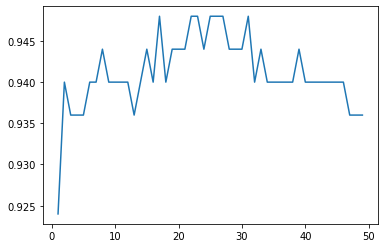

Best K value is 17 
with 0.948 accuracy on the test set


In [117]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()
#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

In [118]:
# New KNN Model with K = 17
knn2pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=17))
knn2pipe.fit(X_train, y_train)

# Accuracy:
print('Training accuracy:', knn2pipe.score(X_train, y_train))
print('Test accuracy:', knn2pipe.score(X_test, y_test))

Training accuracy: 0.9693333333333334
Test accuracy: 0.948


By Setting our KNN Classifier model with n_neighbours = 17 gives us an accuracy of 94.8% on our test set. We can see that after tuning our hyperparameters, our accuracy on the test set has increased from 93.6% to 94.8%

In [119]:
# save predictions
knnpreds = knn2pipe.predict(X_test)

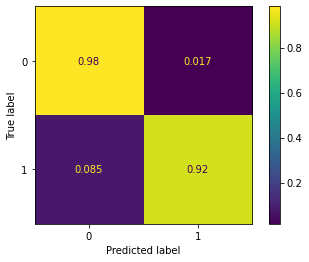

In [120]:
# use ConfusionMatrixDisplay to create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knnpreds,normalize='true');

The confusion matrix shows that this model is very good at predicting users who did not click on Ads vs users who clicked on Ads.

In order to get the full picture of how our model is performing we can take a look at the clasification report

In [121]:
# Creating a classification report for KNN model
print(classification_report(y_test, knnpreds, zero_division =1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       120
           1       0.98      0.92      0.95       130

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



We can see that the KNN Classifier model gives us an overall accuracy of 94%

### 3) Logistic Regression

In [122]:
# Make an instance of the default model
logreg1 = LogisticRegression(random_state=42)

# Put preprocessor and model in a pipeline
logreg1_pipe = make_pipeline(scaler, logreg1)

# Training the model on the data, storing the information learned from the data

logreg1_pipe.fit(X_train, y_train)
print(logreg1_pipe.score(X_train, y_train))
print(logreg1_pipe.score(X_test, y_test))

0.976
0.964


The default model uses solver = 'lbfgs' with L2 regularization, and a C value of 1.0.  
With the default model we get the below scores: 

Training Score: 0.976

Testing Score: 0.964

### 3. a) tuning L1 ('l1')

Let's see if we can improve the test score by changing the value of C

{0.0001: 0.48,
 0.001: 0.48,
 0.01: 0.928,
 0.1: 0.944,
 1: 0.964,
 10: 0.956,
 100: 0.956,
 1000: 0.956}

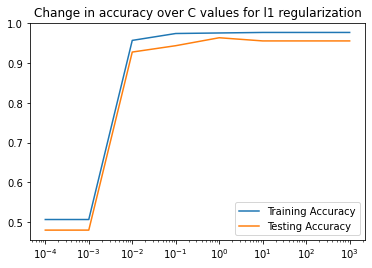

In [123]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1',random_state=42)
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

According to this graph we get the best accuracy on the test set when C= 1. This gives us the same result as our default model

### 3. b) tuning L2 ('l2')

{0.0001: 0.94,
 0.001: 0.94,
 0.01: 0.94,
 0.1: 0.948,
 1: 0.964,
 10: 0.956,
 100: 0.956,
 1000: 0.956}

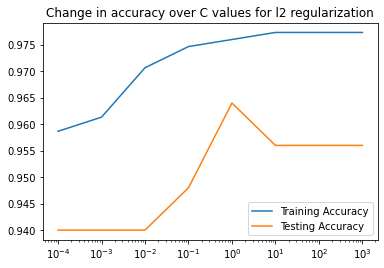

In [124]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2',random_state=42)
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

According to this graph we get the best accuracy on the test set when C= 1. This gives us the same result as our default model

In [125]:
# New models with solver='liblinear', penalty='l2'and 'l1' and C=1

# Make an instance of the default model
logreg2 = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty='l1',random_state=42)
logreg3 = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty='l2',random_state=42)

# Put preprocessor and model in a pipeline
logreg2_pipe = make_pipeline(scaler, logreg2)
logreg3_pipe = make_pipeline(scaler, logreg3)

# Fitting the model on the data
logreg2_pipe.fit(X_train, y_train)
logreg3_pipe.fit(X_train, y_train)

# Evaluate new model with penalty='l1'
print('Accuracy of Train set with L1 penalty', accuracy_score(y_train, logreg2_pipe.predict(X_train)))
print('Accuracy of Test set with L1 penalty', accuracy_score(y_test, logreg2_pipe.predict(X_test)))

# Evaluate new model with penalty='l2'
print('Accuracy of Train set with L2 penalty', accuracy_score(y_train, logreg3_pipe.predict(X_train)))
print('Accuracy of Test set with L2 penalty', accuracy_score(y_test, logreg3_pipe.predict(X_test)))


Accuracy of Train set with L1 penalty 0.976
Accuracy of Test set with L1 penalty 0.964
Accuracy of Train set with L2 penalty 0.976
Accuracy of Test set with L2 penalty 0.964


By Setting our logistic regression model with solver='liblinear', penalty='l2'or 'l1' and C=1 gives us an accuracy of 96.4% on our test set
 
Both of these are similar to our default model. 


In [126]:
# save predictions
predlr = logreg2_pipe.predict(X_test)

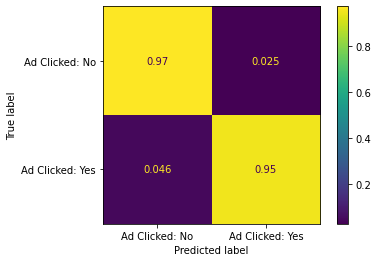

In [134]:
# Define labels for the confusion matrix
labels = ['Ad Clicked: No', 'Ad Clicked: Yes']

# use ConfusionMatrixDisplay to create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predlr,  normalize='true', display_labels = labels);


The confusion matrix shows that this model is slightly better at predicting users who did not click on Ads vs users who clicked on Ads.

In order to get the full picture of how our model is performing we can take a look at the classification report

In [ ]:
# for logistic regresion model
print(classification_report(y_test, predlr, zero_division =1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       120
           1       0.98      0.95      0.96       130

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



We can see that the Logistic Regression model gives us an overall accuracy of 96%

# Feature Engineering

Using the copy of the dataset let us see if we can extract some additional features for our dataset using feature engineering techniques

In [ ]:
# Lets look at our columns and their datatypes
df_fe.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

Let us convert our Timestamp column to type datetime so we can use it to extract information about user behaviour through feature engineering techniques.

In [ ]:
# Converting Timestamp column from object to datetime dtype
df_fe['Timestamp'] = pd.to_datetime(df_fe['Timestamp'])
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [ ]:
# dropping coulmns with too many unique values 
df_fe.drop(['Ad Topic Line','City', 'Country'], axis=1, inplace = True)
df_fe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


Lets extract some feature from the "Timestamp" column

In [ ]:
# Month 
df_fe['month'] = df_fe['Timestamp'].dt.month_name()
# Day of the week
df_fe['day of week'] = df_fe['Timestamp'].dt.day_name()
# Hour of the day
df_fe['hour of day'] = df_fe['Timestamp'].dt.hour.astype('object')
df_fe.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Male                                 int64
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
month                               object
day of week                         object
hour of day                         object
dtype: object

In [ ]:
# Droping the 'Timestamp' column
df_fe.drop(columns= 'Timestamp', inplace= True)
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   month                     1000 non-null   object 
 7   day of week               1000 non-null   object 
 8   hour of day               1000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


# Machine Learning With Feature Engineering 

We will use our feature engineered dataset for our machine learning model

## Splitting the Dataset

In [ ]:
# Define features (X) and target (y)
X = df_fe.drop(['Clicked on Ad'], axis=1)
y = df_fe['Clicked on Ad']

In [ ]:
# Train test split the data to prepare for machine learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Understanding our features 

We will scale all our numeric columns

We will encode Nominal Features (month, day of week, hour of day) with the OneHotEncoder

## Instantiate Transformers

In [ ]:
# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
# Creating Tuples for Column Transformer
number_tuple = (scaler, num_selector)
nominal_tuple = (ohe, cat_selector)

In [ ]:
# Create Column Transformer to Apply Different Preprocessing to Different Columns
preprocessor = make_column_transformer(number_tuple,nominal_tuple, remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13750>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13810>)])

Fit the Column Transformer on the Training Data

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13750>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13810>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64




array([[-0.5281241 ,  0.1981716 ,  0.49398676, ...,  0.        ,
         0.        ,  0.        ],
       [-1.63798195,  0.1981716 , -1.37473758, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5174544 , -0.36695654, -0.47903647, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.65204349,  0.98935101, -0.22898187, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5268686 ,  0.65027412,  1.31351945, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.56039234,  0.42422286,  0.34103109, ...,  0.        ,
         0.        ,  0.        ]])

## Now let us build a model to help classify our Clicked on Ads variable

### 1) Random Forest

In [ ]:
# Create a default model 
# Make an instance of the model
rf_clf = RandomForestClassifier(random_state=42)

# Put scaler and model in a pipeline
rf_clf_pipe = make_pipeline(preprocessor, rf_clf)
rf_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13750>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13810>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# Accuracy:
print('Accuracy of Train set', accuracy_score(y_train, rf_clf_pipe.predict(X_train)))
print('Accuracy of Test set', accuracy_score(y_test, rf_clf_pipe.predict(X_test)))

Accuracy of Train set 1.0
Accuracy of Test set 0.94


With the default model we get the below scores: 

Training Score: 1.0

Testing Score: 0.94

Lets try to improve our model by tuning hyperparameters

In [ ]:
# What was the max depth of our default tree?
est_depths = [estimator.get_depth() for estimator in rf_clf.estimators_]
max(est_depths)

21

In [ ]:
# List of values to try for max_depth:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestClassifier(max_depth=depth, random_state=42)
   modelp = make_pipeline(preprocessor, model)
   modelp.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = modelp.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = modelp.score(X_test, y_test)
   scores.head()

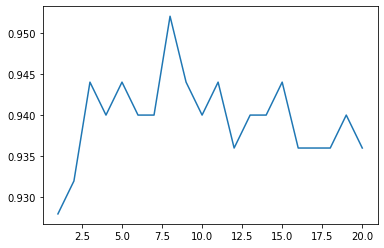

In [ ]:
# plot the change in scores to see if that gives us insight into the best maximum depth.
plt.plot(scores['Test Score'])

In [ ]:
# store the scores in the scores dataframe
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
8,0.952,0.993333
11,0.944,0.998667
3,0.944,0.964000
5,0.944,0.984000
9,0.944,0.996000


In [ ]:
# choose a couple of values for n_estimators 
n_ests = [10, 20,30,40,50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=4)
   modelp = make_pipeline(preprocessor, model)
   modelp.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = modelp.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = modelp.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
10,0.9,0.949333
20,0.92,0.958667
30,0.94,0.964
40,0.932,0.973333
50,0.944,0.976


In [ ]:
# store the scores in the scores dataframe
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
50,0.944,0.976
150,0.944,0.982667
200,0.944,0.98
250,0.944,0.976
30,0.94,0.964


In [ ]:
# Lets set the n_estimator to 50 and max_depth = 4
rf_2 = RandomForestClassifier( n_estimators=50,max_depth=4, random_state=42)
rf_2_pipe = make_pipeline(preprocessor, rf_2)
rf_2_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13750>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13810>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=50,
                                        random_state=42))])

In [ ]:
# Accuracy:
print('Training accuracy:', rf_2_pipe.score(X_train, y_train))
print('Test accuracy:', rf_2_pipe.score(X_test, y_test))

Training accuracy: 0.976
Test accuracy: 0.944


By Setting our Random Forest Classifier model with n_estimator = 50 and max_depth = 4 gives us an accuracy of 94.4% on our test set. 
We can see that after tuning our hyperparameters, our accuracy on the test set has increased from 94% to 94.4%

In [ ]:
# save predictions
rfpreds = rf_2_pipe.predict(X_test)

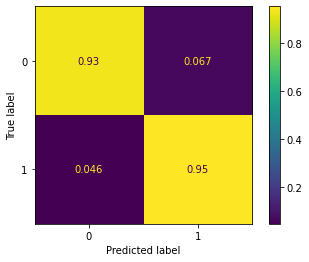

In [ ]:
# use ConfusionMatrixDisplay to create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rfpreds,normalize='true');


The confusion matrix shows that this model is slightly better at predicting users who clicked on Ads vs users who did not click on Ads.

In order to get the full picture of how our model is performing we can take a look at the clasification report

In [ ]:
# Clasification report for RF model
print(classification_report(y_test, rfpreds, zero_division =1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       120
           1       0.94      0.95      0.95       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



We can see that the Random Forest Classifier model gives us an overall accuracy of 94%

### 2) KNN


In [ ]:
# Create a default KNN model and make an instance of the model
knn1 = KNeighborsClassifier()

# Put preprocessor and model in a pipeline
knn1_pipe = make_pipeline(preprocessor, knn1)
knn1_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13750>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13810>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Evaluate default KNN model  
print('Accuracy of Train set', accuracy_score(y_train, knn1_pipe.predict(X_train)))
print('Accuracy of Test set', accuracy_score(y_test, knn1_pipe.predict(X_test)))

Accuracy of Train set 0.9693333333333334
Accuracy of Test set 0.924


With the default model we get the below scores: 

Training Score: 0.969

Testing Score: 0.924

Lets try to improve our model by tuning hyperparameters

In [ ]:
# Looking at our default model parameters
knn1_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13750>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f15ecb13810>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': False,
 'columntransformer__remainde

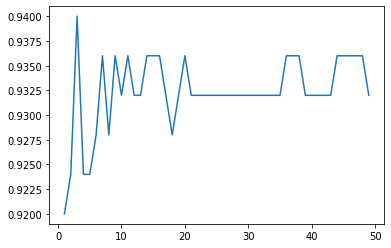

Best K value is 3 
with 0.94 accuracy on the test set


In [ ]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

In [ ]:
# New KNN Model with K = 3
knn2pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=3))
knn2pipe.fit(X_train, y_train)

# Accuracy:
print('Training accuracy:', knn2pipe.score(X_train, y_train))
print('Test accuracy:', knn2pipe.score(X_test, y_test))

Training accuracy: 0.9733333333333334
Test accuracy: 0.94


By Setting our KNN Classifier model with n_neighbours = 3 gives us an accuracy of 94% on our test set. 
We can see that after tuning our hyperparameters, our accuracy on the test set has increased from 92.4% to 94%

In [ ]:
# save predictions
knnpreds = knn2pipe.predict(X_test)

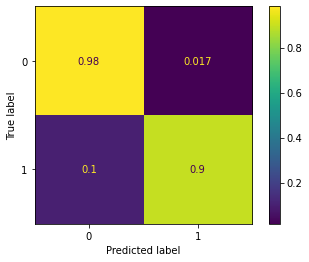

In [ ]:
# use ConfusionMatrixDisplay to create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knnpreds,normalize='true');

The confusion matrix shows that this model is very good at predicting users who did not click on Ads vs users who clicked on Ads.



In order to get the full picture of how our model is performing we can take a look at the clasification report

In [ ]:
# Creating a classification report for KNN model
print(classification_report(y_test, knnpreds, zero_division =1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       120
           1       0.98      0.90      0.94       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



We can see that the KNN Classifier model gives us an overall accuracy of 94%

### 3) Logistic Regression

In [ ]:
# Make an instance of the default model
logreg1 = LogisticRegression(random_state=42)

# Put preprocessor and model in a pipeline
logreg1_pipe = make_pipeline(preprocessor, logreg1)

# Training the model on the data, storing the information learned from the data

logreg1_pipe.fit(X_train, y_train)
print(logreg1_pipe.score(X_train, y_train))
print(logreg1_pipe.score(X_test, y_test))

0.984
0.952


The default model uses solver = 'lbfgs' with L2 regularization, and a C value of 1.0.  
With the default model we get the below scores: 

Training Score: 0.984

Testing Score: 0.952

### 3. a) tuning L1 ('l1')

Let's see if we can improve the test score by changing the value of C

{0.0001: 0.48,
 0.001: 0.48,
 0.01: 0.928,
 0.1: 0.944,
 1: 0.956,
 10: 0.948,
 100: 0.948,
 1000: 0.952}

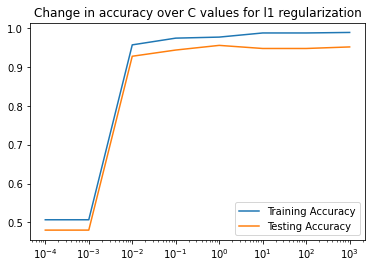

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1',random_state=42)
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

According to this graph we get the best accuracy on the test set when C= 1. This gives us the same result as our default model

### 3. b) tuning L2 ('l2')

{0.0001: 0.94,
 0.001: 0.936,
 0.01: 0.94,
 0.1: 0.944,
 1: 0.952,
 10: 0.948,
 100: 0.948,
 1000: 0.952}

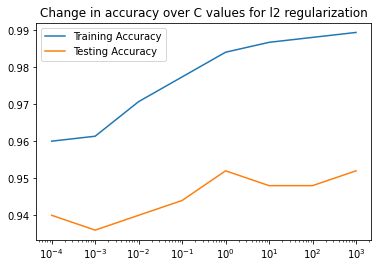

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2',random_state=42)
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

According to this graph we get the best accuracy on the test set when C= 1. This gives us the same result as our default model

In [ ]:
# New models with solver='liblinear', penalty='l2'and 'l1' and C=1

# Make an instance of the default model
logreg2 = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty='l1',random_state=42)
logreg3 = LogisticRegression(C=1, max_iter=1000, solver='liblinear', penalty='l2',random_state=42)

# Put preprocessor and model in a pipeline
logreg2_pipe = make_pipeline(preprocessor, logreg2)
logreg3_pipe = make_pipeline(preprocessor, logreg3)

# Fitting the model on the data
logreg2_pipe.fit(X_train, y_train)
logreg3_pipe.fit(X_train, y_train)

# Evaluate new model with penalty='l1'
print('Accuracy of Train set with L1 penalty', accuracy_score(y_train, logreg2_pipe.predict(X_train)))
print('Accuracy of Test set with L1 penalty', accuracy_score(y_test, logreg2_pipe.predict(X_test)))

# Evaluate new model with penalty='l2'
print('Accuracy of Train set with L2 penalty', accuracy_score(y_train, logreg3_pipe.predict(X_train)))
print('Accuracy of Test set with L2 penalty', accuracy_score(y_test, logreg3_pipe.predict(X_test)))


Accuracy of Train set with L1 penalty 0.9773333333333334
Accuracy of Test set with L1 penalty 0.956
Accuracy of Train set with L2 penalty 0.984
Accuracy of Test set with L2 penalty 0.952


By Setting our logistic regression model with solver='liblinear', penalty='l1' and C=1 gives us an accuracy of 95.6% on our test set

By Setting our logistic regression model with solver='liblinear', penalty='l2' and C=1 gives us an accuracy of 95.2% on our test set
 
Both of these are similar to our default model. 
There is a very slight improvement to our model with 'l1' penalty so we use this model for our predictions 

In [ ]:
# save predictions
predlr = logreg2_pipe.predict(X_test)

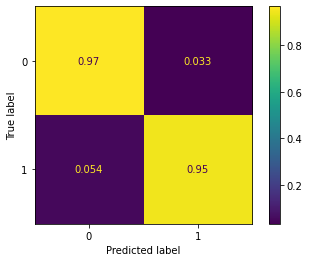

In [ ]:
# use ConfusionMatrixDisplay to create a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predlr, normalize='true');

The confusion matrix shows that this model is slightly better at predicting users who did not click on Ads vs users who clicked on Ads.

In order to get the full picture of how our model is performing we can take a look at the classification report

In [ ]:
# for logistic regresion model
print(classification_report(y_test, predlr, zero_division =1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       120
           1       0.97      0.95      0.96       130

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



We can see that the Logistic Regression model gives us an overall accuracy of 96%

# Summary

We recommend using the Logistic Regression model for prediction of the Clicked on Ads variable. Through our analysis we found that the initial model for Logistic regression did not change much when we tried to hyper tune its parameters or add different penalties. Even though we couldn’t improve our initial model, the Logistic Regression model had a better accuracy score than the Random Forest model as well as K Nearest Neighbors model.

The Logistic Regression model also had a high precision and recall score compared to other models. These metrics are important as there is cost associated with digital marketing advertisements and the cost of acting on a false positive could be really high.

Ideally, we would like to improve our score, but 96% may be the best possible with the available data. Since advertising agency in the real world would probably have a lot more data which we can use to further analyze and draw insights.